# Optimizing a Healthcare Network for Improved Service Delivery


<a id='toc'></a>
## Table of Content:

[1. Data Gathering](#l1)<br>
[2. Data Understanding](#l2)<br>
[3. Data Cleaning](#l3)<br>
[4. Data Manipulation](#l4)<br>
[5. Optimization](#l5)<br>
>[5.1. Coded Solution of the Problem](#l5.1)<br>
[5.2 Final Result](#l5.2)<br>
[5.3 Finding distance from each area to other area](#l5.3)<br>
[5.4 Visualizing Distances Using Folium map](#l5.4)<br>

[Conclusion](#conclusion)<br>

<a id='l1'></a>
## 1. Data Gathering: 
Read table from Washington Demographics and make its data frame.

In [5]:
# read table from Washington-Demographic data
import pandas as pd

df = pd.read_html('https://www.washington-demographics.com/zip_codes_by_population',header=0)

population_df = df[0]
population_df.head()

,Rank,Zip Code,Population
0,1,99301,77226
1,2,98052,65251
2,3,98012,62039
3,4,98208,58030
4,5,98682,56411


[Table of Content](#toc)

<a id='l2'></a>
## 2. Data Understanding: 
Understand the gathered data with different pandas method.

In [6]:
# check the shape of dataframe
population_df.shape

(564, 3)

In [7]:
# check the dimension of dataframe
population_df.ndim

2

In [8]:
# check the datatypes of dataframe's columns
population_df.dtypes

Rank          object
Zip Code      object
Population    object
dtype: object

In [9]:
# check dataframe columns
population_df.columns

Index(['Rank', 'Zip Code', 'Population'], dtype='object')

In [10]:
# check dataframes statistical summery
population_df.describe()

,Rank,Zip Code,Population
count,564,564,564
unique,564,564,564
top,526,98008,31098
freq,1,1,1


In [11]:
# check 1st 5 rows of dataframe
population_df.head()

,Rank,Zip Code,Population
0,1,99301,77226
1,2,98052,65251
2,3,98012,62039
3,4,98208,58030
4,5,98682,56411


[Table of Content](#toc)

<a id='l3'></a>
## 3. Data Cleaning:
Clean data for the manipulation purpose.

In [12]:
population_df.tail()

,Rank,Zip Code,Population
559,560,98853,16
560,561,98238,11
561,562,98852,7
562,563,99034,1
563,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...


In [13]:
# Now we delete last row which is just the description of the table
population_df = population_df.drop([563], axis=0)

In [14]:
population_df.tail()

,Rank,Zip Code,Population
558,559,98641,20
559,560,98853,16
560,561,98238,11
561,562,98852,7
562,563,99034,1


In [15]:
# Convert Population column into type int
population_df = population_df.astype({"Population": int})

In [16]:
population_df['Population'].dtypes

dtype('int32')

In [18]:
# Now we delete the column "Washington Zip codes by Population rank', becuse it is unncessary here
population_df.drop(["Rank"], axis = 1, inplace = True)

In [19]:
population_df.head()

,Zip Code,Population
0,99301,77226
1,98052,65251
2,98012,62039
3,98208,58030
4,98682,56411


[Table of Content](#toc)

<a id='l4'></a>
## 4. Data Manipulation:
Now manipulate the data for the desired solution.

In [20]:
# Its time to extract only the information of those area that is given in the document, so we make a new df
df1 = population_df[population_df['Zip Code'].isin(['98007','98290','98065','98801','98104']) ]
df1

,Zip Code,Population
23,98801,43242
60,98290,34043
96,98007,27954
189,98065,15081
192,98104,14143


In [21]:
# reset the index of new df
df1 = df1.reset_index(drop=True)
df1

,Zip Code,Population
0,98801,43242
1,98290,34043
2,98007,27954
3,98065,15081
4,98104,14143


In [22]:
# make dataframe that is given in the document
facility_id = ['A','B','C','D','E']
facility_area_zip_code = ['98007','98290','98065','98801','98104'] 
facility_staff_count = [21, 52, 43, 9, 64]
df2 = pd.DataFrame({'Facility ID': facility_id,
                         'Zip Code': facility_area_zip_code,
                          'Facility Staff Count': facility_staff_count
                        })
df2

,Facility ID,Zip Code,Facility Staff Count
0,A,98007,21
1,B,98290,52
2,C,98065,43
3,D,98801,9
4,E,98104,64


In [23]:
# merge both dataframes df1 & df2 in which same column is Zip code
facilities = pd.merge(df2, df1, on = 'Zip Code')
facilities

,Facility ID,Zip Code,Facility Staff Count,Population
0,A,98007,21,27954
1,B,98290,52,34043
2,C,98065,43,15081
3,D,98801,9,43242
4,E,98104,64,14143


In [24]:
# Set the order of above dataframe
facilities = facilities[['Facility ID', 'Zip Code', 'Population', 'Facility Staff Count']]
facilities

,Facility ID,Zip Code,Population,Facility Staff Count
0,A,98007,27954,21
1,B,98290,34043,52
2,C,98065,15081,43
3,D,98801,43242,9
4,E,98104,14143,64


### Now our data is completely ready for finding the solution of the given problem

[Table of Content](#toc)

<a id='l5'></a>
## 5. Optimization

<a id='l5.1'></a>
### 5.1 Coded Solution of the Problem

First of all, we'll find a current healthcare worker to patient ratio.

In [25]:
facilities['Healthcare worker to patient ratio'] = facilities['Population']/ facilities['Facility Staff Count']
facilities

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Facility ID,Zip Code,Population,Facility Staff Count,Healthcare worker to patient ratio
0,A,98007,27954,21,1331.142857
1,B,98290,34043,52,654.673077
2,C,98065,15081,43,350.720930
3,D,98801,43242,9,4804.666667
4,E,98104,14143,64,220.984375


In [26]:
# change "Healthcare worker to patient ratio" col into integer data type
facilities = facilities.astype({"Healthcare worker to patient ratio": int})
facilities

,Facility ID,Zip Code,Population,Facility Staff Count,Healthcare worker to patient ratio
0,A,98007,27954,21,1331
1,B,98290,34043,52,654
2,C,98065,15081,43,350
3,D,98801,43242,9,4804
4,E,98104,14143,64,220


Here we can see that all facilities in the above table having good Healthcare worker to patient ratios except facility D, so now we write the code to shift enough healthcare workers into those places where they are less in quantity.


We shift the number of staff into different facilities according to the percentage of the population.

In [27]:
# find percentage of the population of each area 
population_percentage_in_area = []
total_population = facilities['Population'].sum()
total_staff = facilities['Facility Staff Count'].sum()
for i in facilities['Population']:
    p = (i / total_population) * 100
    population_percentage_in_area.append(p)
    
# convert number of staff according to the population percentage in each area

staff1 = []
for i in facilities.index:
    s = (population_percentage_in_area[i] * total_staff) / 100
    staff1.append(round(s))


In [28]:
# Display Population Percantage in each area & converted staff according to it
print(population_percentage_in_area)
print(staff1)

[20.789362129359006, 25.31774540208087, 11.21572477187033, 32.15903259632761, 10.518135100362182]
[39.0, 48.0, 21.0, 61.0, 20.0]


Now make both of the above entities as a part of the data frame.

In [29]:
new_facility_with_updated_staff = facilities.drop(['Facility Staff Count', 'Healthcare worker to patient ratio'], axis = 1)
new_facility_with_updated_staff['New Staff Count'] = staff1
new_facility_with_updated_staff['New Healthcare worker to patient ratio'] = round(new_facility_with_updated_staff['Population'] / new_facility_with_updated_staff['New Staff Count'])
new_facility_with_updated_staff

,Facility ID,Zip Code,Population,New Staff Count,New Healthcare worker to patient ratio
0,A,98007,27954,39.0,717.0
1,B,98290,34043,48.0,709.0
2,C,98065,15081,21.0,718.0
3,D,98801,43242,61.0,709.0
4,E,98104,14143,20.0,707.0


Now we create a data frame that also has area column(having the complete address of area).

In [31]:
# install geopy
! pip install geopy

In [33]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim()
area = []
for i in new_facility_with_updated_staff['Zip Code']:
    location = geolocator.geocode(i) 
    area.append(location.address)
    
area

new_facility_with_updated_staff['Area'] = area
new_facility_with_updated_staff


C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,Facility ID,Zip Code,Population,New Staff Count,New Healthcare worker to patient ratio,Area
0,A,98007,27954,39.0,717.0,"Bellevue, King County, Washington, 98007, Unit..."
1,B,98290,34043,48.0,709.0,"Snohomish County, Washington, 98290, United St..."
2,C,98065,15081,21.0,718.0,"Montalbano Elicona, Messina, Sicilia, 98065, I..."
3,D,98801,43242,61.0,709.0,"Wenatchee, Chelan County, Washington, 98801, U..."
4,E,98104,14143,20.0,707.0,"ძველი თბილისის რაიონი, თბილისი, 98104, Georgia..."


[Table of Content](#toc)

<a id='l5.2'></a>
### 5.2 Final Result

In [34]:
# arrange the columns of df
new_facility_with_updated_staff = new_facility_with_updated_staff[['Facility ID', 'Zip Code', 'Area', 'Population', 'New Staff Count', 'New Healthcare worker to patient ratio']]
new_facility_with_updated_staff

,Facility ID,Zip Code,Area,Population,New Staff Count,New Healthcare worker to patient ratio
0,A,98007,"Bellevue, King County, Washington, 98007, Unit...",27954,39.0,717.0
1,B,98290,"Snohomish County, Washington, 98290, United St...",34043,48.0,709.0
2,C,98065,"Montalbano Elicona, Messina, Sicilia, 98065, I...",15081,21.0,718.0
3,D,98801,"Wenatchee, Chelan County, Washington, 98801, U...",43242,61.0,709.0
4,E,98104,"ძველი თბილისის რაიონი, თბილისი, 98104, Georgia...",14143,20.0,707.0


#### This is the approximate staff count that is distributed/ allocated according to population percentage in each area.

[Table of Content](#toc)

<a id='l5.3'></a>
### 5.3 Finding the distance from each area to other areas

##### Now its time to find the distance from each area to other areas.
To perform this task, we use geopy library. It is a python library that makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

In [35]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim()

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [36]:
# import geodesic module for finding distance between 2 locations
from geopy.distance import geodesic
iterator = len(new_facility_with_updated_staff.index)

distance_in_miles = []
distance_in_km = []
each_area = []
other_area = []

# find distance from each area to another area and store their result in the above lists
for i in range(iterator):
    location_a = geolocator.geocode(new_facility_with_updated_staff['Zip Code'][i]) 
    area1 = new_facility_with_updated_staff['Facility ID'][i]
    a_lat = location_a.latitude
    a_long = location_a.longitude
    point_a = (a_lat, a_long)
    
    for j in range(i+1, iterator):
        location_b = geolocator.geocode(new_facility_with_updated_staff['Zip Code'][j]) 
        b_lat = location_b.latitude
        b_long = location_b.longitude
        point_b = (b_lat, b_long)
        distance_miles = geodesic(point_a, point_b).miles 
        distance_in_miles.append(round(distance_miles,2))
        distance_km = geodesic(point_a, point_b).km 
        distance_in_km.append(round(distance_km,2))
        area2 = new_facility_with_updated_staff['Facility ID'][j]
        each_area.append(area1)
        other_area.append(area2)
        
        


In [37]:
# print all lists
print(each_area)
print(other_area)
print(distance_in_miles)
print(distance_in_km)

['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D']
['B', 'C', 'D', 'E', 'C', 'D', 'E', 'D', 'E', 'E']
[22.37, 5973.73, 85.35, 6230.16, 5953.27, 87.82, 6207.79, 5937.81, 1595.52, 6226.89]
[35.99, 9613.79, 137.37, 10026.46, 9580.86, 141.33, 9990.48, 9555.98, 2567.74, 10021.21]


 Now we make a dataframe that shows distance between each area to every other area.

In [38]:
distance_df = pd.DataFrame({"Each Area": each_area,
                           "Other Area": other_area,
                           "Distance in Miles": distance_in_miles,
                           "Distance in Km": distance_in_km})

distance_df

,Each Area,Other Area,Distance in Miles,Distance in Km
0,A,B,22.37,35.99
1,A,C,5973.73,9613.79
2,A,D,85.35,137.37
3,A,E,6230.16,10026.46
4,B,C,5953.27,9580.86
5,B,D,87.82,141.33
6,B,E,6207.79,9990.48
7,C,D,5937.81,9555.98
8,C,E,1595.52,2567.74
9,D,E,6226.89,10021.21


In [39]:
# arrange all the columns
distance_df = distance_df[["Each Area", "Other Area", "Distance in Miles", "Distance in Km"]]
distance_df

,Each Area,Other Area,Distance in Miles,Distance in Km
0,A,B,22.37,35.99
1,A,C,5973.73,9613.79
2,A,D,85.35,137.37
3,A,E,6230.16,10026.46
4,B,C,5953.27,9580.86
5,B,D,87.82,141.33
6,B,E,6207.79,9990.48
7,C,D,5937.81,9555.98
8,C,E,1595.52,2567.74
9,D,E,6226.89,10021.21


Make a pivot table so data become easily readable. It takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [41]:
distance_df_km = distance_df[["Each Area", "Other Area", "Distance in Km"]]
distance_df_km

,Each Area,Other Area,Distance in Km
0,A,B,35.99
1,A,C,9613.79
2,A,D,137.37
3,A,E,10026.46
4,B,C,9580.86
5,B,D,141.33
6,B,E,9990.48
7,C,D,9555.98
8,C,E,2567.74
9,D,E,10021.21


In [42]:
# make pivot table for above data frame
distance_df_km_pivot = distance_df_km.pivot(index = "Each Area", columns = "Other Area")
distance_df_km_pivot

Distance in Km                            
Other Area              B        C        D         E
Each Area                                            
A                   35.99  9613.79   137.37  10026.46
B                     NaN  9580.86   141.33   9990.48
C                     NaN      NaN  9555.98   2567.74
D                     NaN      NaN      NaN  10021.21

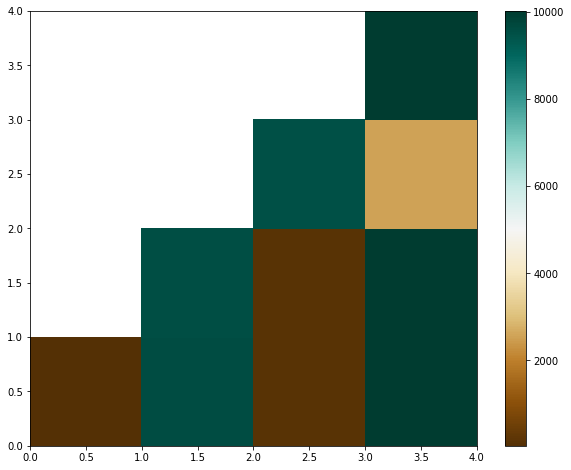

In [49]:
# visualize above pivot table as a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.pcolor(distance_df_km_pivot, cmap = 'BrBG')
plt.colorbar()
plt.show()

In [50]:
# Make pivot table for making above df easy to read

distance_df_pivot = distance_df.pivot(index = "Each Area", columns = "Other Area")
distance_df_pivot

Distance in Miles                            Distance in Km  \
Other Area                 B        C        D        E              B   
Each Area                                                                
A                      22.37  5973.73    85.35  6230.16          35.99   
B                        NaN  5953.27    87.82  6207.79            NaN   
C                        NaN      NaN  5937.81  1595.52            NaN   
D                        NaN      NaN      NaN  6226.89            NaN   

                                        
Other Area        C        D         E  
Each Area                               
A           9613.79   137.37  10026.46  
B           9580.86   141.33   9990.48  
C               NaN  9555.98   2567.74  
D               NaN      NaN  10021.21

[Table of Content](#toc)

<a id='l5.4'></a>
### 5.4 Visualizing Distances Using Folium Map

Now we can easily read and visualize data.

##### Its time to install folium that is a powerful Python library that helps in creating several types of Leaflet maps.

In [51]:
# install folium
!pip install folium==0.5.0
import folium

print('Folium installed and imported!')

  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76257 sha256=77d56c3bf10637919cba833f87988189cf5ac75d39dd3fe2f781ad4d7fac125d
  Stored in directory: C:\Users\d store\AppData\Local\pip\Cache\wheels\f8\98\ff\954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
  Found existing installation: folium 0.10.0
    Uninstalling folium-0.10.0:
      Successfully uninstalled folium-0.10.0
Folium installed and imported!


In [52]:
# Create map of zip code 98007
import folium
loc = geolocator.geocode("98007") 
#print((location.latitude, location.longitude)) 
world_map = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=13)

# display world map
world_map

In [53]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
lat = loc.latitude
lng = loc.longitude
# loop through the 100 crimes and add each to the incidents feature group
incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
label = geolocator.geocode("98007").address
folium.Marker([lat, lng], popup=label).add_to(world_map)   
world_map.add_child(incidents)


To show distances from one area to other areas, we make df that contain facility id with its area coordinates.

In [54]:


latitudes = []
longitudes = []

for i in facility_area_zip_code:
    location = geolocator.geocode(i)
    lat = location.latitude
    latitudes.append(lat)
    lng = location.longitude
    longitudes.append(lng)


In [55]:
print(facility_id)
print(facility_area_zip_code)
print(latitudes)
print(longitudes)

['A', 'B', 'C', 'D', 'E']
['98007', '98290', '98065', '98801', '98104']
[47.6097014481033, 47.9297551801192, 38.0242788631552, 47.4340912339767, 41.7096925]
[-122.146678382306, -122.074540801516, 15.0135874203079, -120.341206400495, 44.7970253]


In [56]:
area_with_coordinates = pd.DataFrame({"Facility Id":facility_id ,
                                     "Facility Area Zip Code": facility_area_zip_code,
                                     "Latitudes": latitudes,
                                     "Longitudes": longitudes})

area_with_coordinates

,Facility Id,Facility Area Zip Code,Latitudes,Longitudes
0,A,98007,47.609701,-122.146678
1,B,98290,47.929755,-122.074541
2,C,98065,38.024279,15.013587
3,D,98801,47.434091,-120.341206
4,E,98104,41.709693,44.797025


##### Start creating maps from one area to others

In [57]:
# map from facility id 'A' to 'B'
import folium 

my_map1 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 9) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map1) 

folium.Marker([area_with_coordinates['Latitudes'][1], area_with_coordinates['Longitudes'][1]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][1]).add_to(my_map1) 

# Add a line to the map by using line method . 
# it connect both coordiates by the line 
# line_opacity implies intensity of the line 

folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][1], area_with_coordinates['Longitudes'][1])], 
line_opacity = 0.5).add_to(my_map1) 

my_map1


In [58]:
# map from facility id 'A' to 'C'
my_map2 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 10) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map2) 

folium.Marker([area_with_coordinates['Latitudes'][2], area_with_coordinates['Longitudes'][2]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][2]).add_to(my_map2) 
folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][2], area_with_coordinates['Longitudes'][2])], 
line_opacity = 0.5).add_to(my_map2) 

my_map2


In [59]:
# map from facility id 'A' to 'D'
my_map3 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 8.3) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map3) 

folium.Marker([area_with_coordinates['Latitudes'][3], area_with_coordinates['Longitudes'][3]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][3]).add_to(my_map3) 
folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][3], area_with_coordinates['Longitudes'][3])], 
line_opacity = 0.5).add_to(my_map3) 

my_map3


In [60]:
# map from facility id 'A' to 'E'
my_map4 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 9) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map4) 

folium.Marker([area_with_coordinates['Latitudes'][4], area_with_coordinates['Longitudes'][4]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][4]).add_to(my_map4) 

# Add a line to the map by using line method . 
# it connect both coordiates by the line 
# line_opacity implies intensity of the line 

folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][4], area_with_coordinates['Longitudes'][4])], 
line_opacity = 0.5).add_to(my_map4) 

my_map4


We can create more distance maps same as above

<a id='conclusion'></a>
## Conclusion:
So in this project, we modeled the number of staff members needed in each area depending on the level of care & rule of thumb. Furthermore, we found the distances from each area to other areas and then we created leaflet maps of those distances with folium library.